<a href="https://colab.research.google.com/github/SamuelLawrence876/Image-Classification-Fashion-MNIST-with-TF/blob/master/Fashion_Mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [76]:
fashion_mnist = keras.datasets.fashion_mnist

In [77]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [79]:
train_images.shape

(60000, 28, 28)

In [80]:
len(train_labels)

60000

Image we are trying to classify

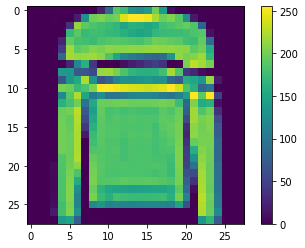

In [81]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)

**Scaling Down values to fit in our network / Pre-Processing**

In [82]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Displaying Images of the different clotthing types

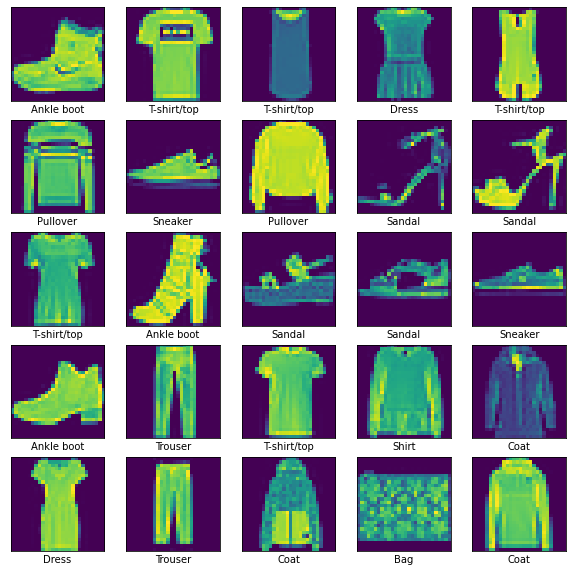

In [101]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training Model

In [86]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [87]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy', test_acc)

313/313 - 0s - loss: 0.3445 - accuracy: 0.8843
Test accuracy 0.8842999935150146


In [88]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [89]:
predictions = probability_model.predict(test_images)

In [90]:
predictions[0]

array([1.2929985e-07, 2.0709531e-10, 3.3195282e-09, 1.5285245e-08,
       2.9429829e-08, 1.0226925e-04, 1.0103022e-05, 2.0500172e-03,
       3.5057344e-08, 9.9783748e-01], dtype=float32)

In [91]:
np.argmax(predictions[0])

9

In [92]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

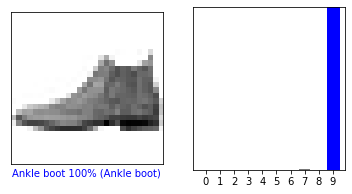

In [93]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

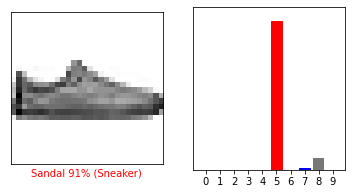

In [94]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

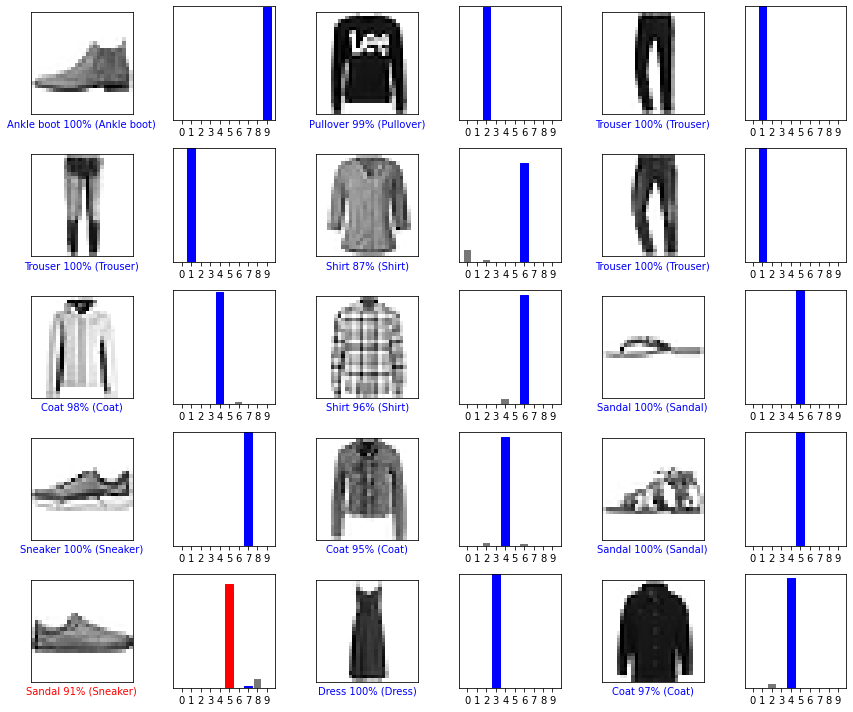

In [95]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [96]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [97]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [98]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.3009685e-05 2.3738140e-11 9.9437165e-01 5.0308141e-10 3.5301005e-03
  1.2068931e-18 2.0752489e-03 3.6549553e-21 6.3221706e-11 3.5847085e-16]]


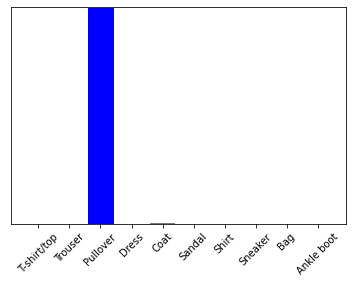

In [99]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [100]:
np.argmax(predictions_single[0])

2